In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
ls -alt ../*.xlsx

-rwxrwxrwx 1 ldhagen ldhagen  17274 Jun 16 16:32 '../Texas COVID-19 Hospitalizations by TSA.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen  95002 Jun 16 16:32 '../Cumulative Tests over Time by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen  81426 Jun 16 16:32 '../Texas COVID-19 Active Case Data by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen  97917 Jun 16 16:32 '../Texas COVID-19 Fatality Count Data by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen 112796 Jun 16 16:32 '../Texas COVID-19 Case Count Data by County.xlsx'*


In [3]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Hospitalizations by TSA.xlsx", header=2)

In [4]:
a = df_Texas_Covid_case.set_index('TSA Name')

In [5]:
a.T['San Antonio'][1:].index[0]

Timestamp('2020-04-08 00:00:00')

In [6]:
count = 0
dated_dict = {}
for x in a.T['San Antonio'][1:]:
  #  print(a.T['San Antonio'][1:].index[count], x)
    dated_dict[a.T['San Antonio'][1:].index[count]] = x
    count += 1

In [7]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Hospitalized'])

In [8]:
c = dated_df.set_index('Date')

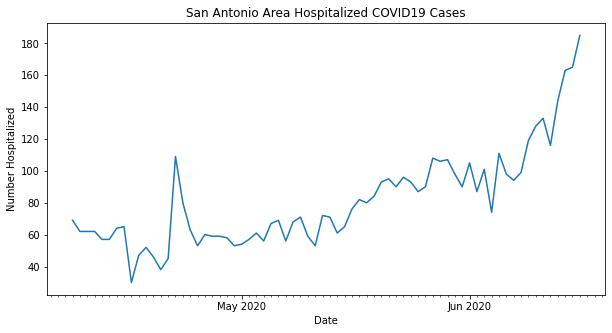

In [9]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Hospitalized',color='black')
plt.plot(c)
plt.title('San Antonio Area Hospitalized COVID19 Cases')
plt.savefig('San Antonio Hospitalized.png')

In [10]:
c

,Hospitalized
Date,
2020-04-08,69
2020-04-09,62
2020-04-10,62
2020-04-11,62
2020-04-12,57
...,...
2020-06-12,116
2020-06-13,144
2020-06-14,163


In [11]:
x = c.diff(periods = 1)

In [12]:
x.rename(columns={'Hospitalized':'Daily Change'}, inplace=True)

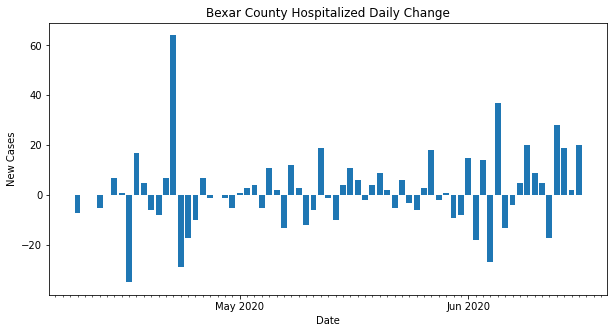

In [13]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Bexar County Hospitalized Daily Change')
plt.bar(x.index,x['Daily Change'])
fig.savefig('BexarHospChangeDaily.png')